In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('model.h5')

# Define the class index mapping based on your training setup
train_class = {
    'baterai': 0,
    'biologis': 1,
    'gelas': 2,
    'kardus': 3,
    'kertas': 4,
    'metal': 5,
    'pakaian': 6,
    'plastik': 7,
    'sepatu': 8
}


# Define category and handling instructions for each label
category_mapping = {
    'baterai': 'anorganik',
    'biologis': 'organik',
    'gelas': 'anorganik',
    'kardus': 'anorganik',
    'kertas': 'anorganik',
    'metal': 'anorganik',
    'pakaian': 'anorganik',
    'plastik': 'anorganik',
    'sepatu': 'anorganik'
}

handling_instructions = {
    'baterai': """Baterai adalah sampah anorganik berbahaya yang mengandung bahan kimia beracun. Pengelolaannya harus dilakukan dengan hati-hati untuk menghindari kerusakan lingkungan.
- Kumpulkan baterai bekas di wadah terpisah.
- Jangan membuangnya bersama sampah rumah tangga.
- Bawa ke titik pengumpulan atau fasilitas daur ulang khusus untuk baterai.""",
    
    'biologis': """Sampah biologis atau organik adalah sisa-sisa bahan alami yang dapat terurai. Contohnya termasuk sisa makanan, daun, dan bahan taman.
- Kumpulkan sampah organik di tempat sampah khusus organik.
- Sampah organik bisa dikomposkan untuk menghasilkan pupuk alami.
- Hindari mencampur sampah organik dengan sampah anorganik untuk memudahkan proses pengomposan.""",
    
    'gelas': """Gelas adalah sampah anorganik yang dapat didaur ulang menjadi produk baru.
- Bersihkan gelas dari sisa makanan atau minuman.
- Pisahkan gelas berdasarkan warnanya jika memungkinkan.
- Bawa ke fasilitas daur ulang gelas atau letakkan di tempat sampah daur ulang gelas.""",
    
    'kardus': """Kardus adalah sampah anorganik yang terbuat dari serat kayu dan mudah didaur ulang.
- Lipat kardus agar tidak memakan banyak tempat.
- Pastikan kardus dalam keadaan bersih dan kering.
- Bawa ke fasilitas daur ulang kertas atau letakkan di tempat sampah daur ulang kertas.""",
    
    'kertas': """Kertas adalah sampah anorganik yang dapat didaur ulang menjadi produk kertas baru.
- Lipat atau gunting kertas agar lebih mudah diolah.
- Pastikan kertas dalam keadaan bersih dan kering.
- Bawa ke fasilitas daur ulang kertas atau letakkan di tempat sampah daur ulang kertas.""",
    
    'metal': """Metal adalah sampah anorganik yang dapat didaur ulang menjadi produk metal baru.
- Bersihkan metal dari sisa makanan atau bahan lainnya.
- Pisahkan metal berdasarkan jenisnya jika memungkinkan.
- Bawa ke fasilitas daur ulang metal atau letakkan di tempat sampah daur ulang metal.""",
    
    'pakaian': """Pakaian adalah sampah anorganik yang dapat didaur ulang atau digunakan kembali.
- Jika pakaian masih layak pakai, donasikan ke panti asuhan atau lembaga sosial.
- Jika tidak layak pakai, bawa ke fasilitas daur ulang tekstil.
- Pisahkan pakaian berdasarkan jenis kain jika memungkinkan.""",
    
    'plastik': """Plastik adalah sampah anorganik yang sangat sulit terurai tetapi dapat didaur ulang menjadi produk baru.
- Bersihkan plastik dari sisa makanan atau bahan lainnya.
- Pisahkan plastik berdasarkan jenisnya jika memungkinkan.
- Bawa ke fasilitas daur ulang plastik atau letakkan di tempat sampah daur ulang plastik.""",
    
    'sepatu': """Sepatu adalah sampah anorganik yang dapat didaur ulang atau digunakan kembali.
- Jika sepatu masih layak pakai, donasikan ke panti asuhan atau lembaga sosial.
- Jika tidak layak pakai, bawa ke fasilitas daur ulang tekstil.
- Pisahkan sepatu berdasarkan bahan pembuatannya jika memungkinkan.""",
}

# Define image dimensions
img_height = 224
img_width = 224

# Function to predict and display the result
def predict_and_display(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (img_height, img_width))
    img_rescaled = img_resized / 255.0
    img_reshaped = np.expand_dims(img_rescaled, axis=0)

    prediction = model.predict(img_reshaped)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_label = list(train_class.keys())[list(train_class.values()).index(predicted_class_index)]
    predicted_category = category_mapping[predicted_class_label]
    predicted_handling = handling_instructions[predicted_class_label]

    print(f"Predicted Class: {predicted_class_label}")
    print(f"Kategori: {predicted_category}")
    print(f"Instruksi Penanganan: {predicted_handling}")

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {predicted_class_label}\nKategori: {predicted_category}\nInstruksi: {predicted_handling}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: gelas
Kategori: anorganik
Instruksi Penanganan: Gelas adalah sampah anorganik yang dapat didaur ulang menjadi produk baru.
- Bersihkan gelas dari sisa makanan atau minuman.
- Pisahkan gelas berdasarkan warnanya jika memungkinkan.
- Bawa ke fasilitas daur ulang gelas atau letakkan di tempat sampah daur ulang gelas.


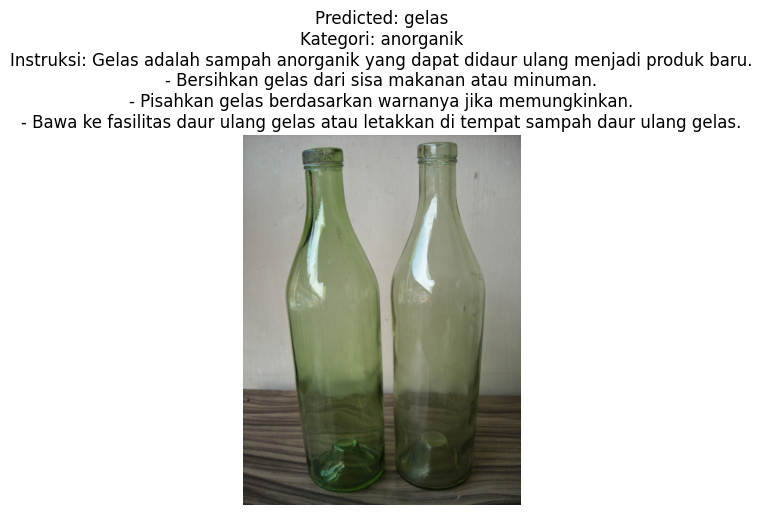

In [4]:
# Example usage
example_image_path = 'testModel/Botol kaca.JPG'
predict_and_display(example_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Class: plastik
Kategori: anorganik
Instruksi Penanganan: Plastik adalah sampah anorganik yang sangat sulit terurai tetapi dapat didaur ulang menjadi produk baru.
- Bersihkan plastik dari sisa makanan atau bahan lainnya.
- Pisahkan plastik berdasarkan jenisnya jika memungkinkan.
- Bawa ke fasilitas daur ulang plastik atau letakkan di tempat sampah daur ulang plastik.


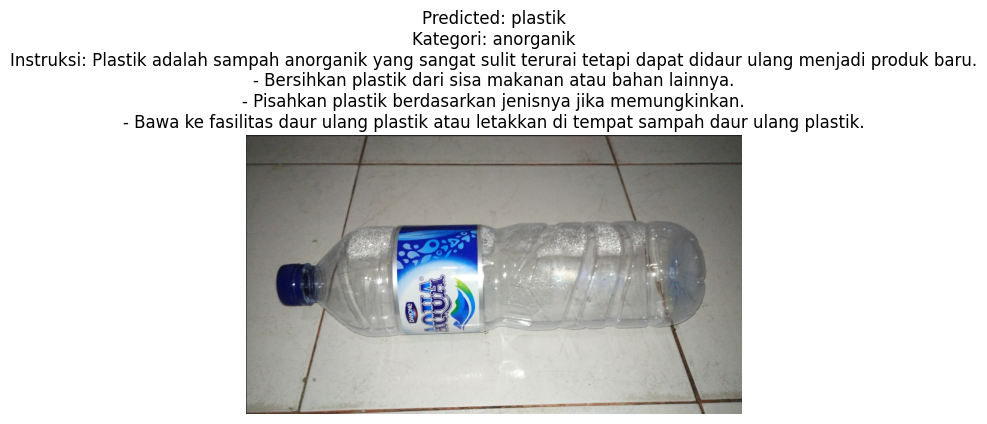

In [5]:
# Example usage
example_image_path = 'testModel/aqua.png'
predict_and_display(example_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Class: baterai
Kategori: anorganik
Instruksi Penanganan: Baterai adalah sampah anorganik berbahaya yang mengandung bahan kimia beracun. Pengelolaannya harus dilakukan dengan hati-hati untuk menghindari kerusakan lingkungan.
- Kumpulkan baterai bekas di wadah terpisah.
- Jangan membuangnya bersama sampah rumah tangga.
- Bawa ke titik pengumpulan atau fasilitas daur ulang khusus untuk baterai.


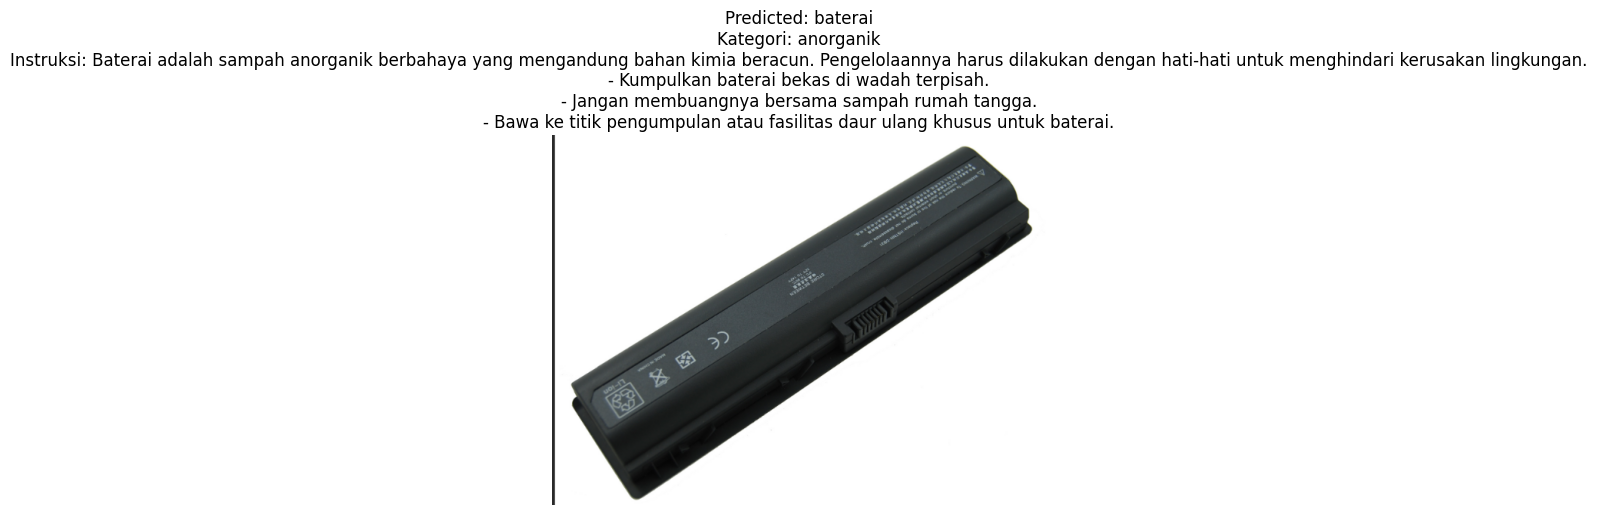

In [6]:
# Example usage
example_image_path = 'testModel/batre.png'
predict_and_display(example_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Class: pakaian
Kategori: anorganik
Instruksi Penanganan: Pakaian adalah sampah anorganik yang dapat didaur ulang atau digunakan kembali.
- Jika pakaian masih layak pakai, donasikan ke panti asuhan atau lembaga sosial.
- Jika tidak layak pakai, bawa ke fasilitas daur ulang tekstil.
- Pisahkan pakaian berdasarkan jenis kain jika memungkinkan.


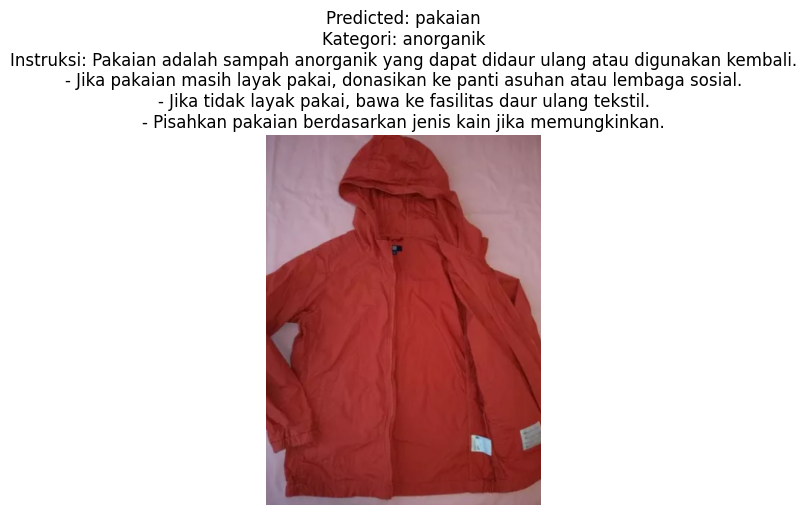

In [7]:
# Example usage
example_image_path = 'testModel/jeket.png'
predict_and_display(example_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Class: kardus
Kategori: anorganik
Instruksi Penanganan: Kardus adalah sampah anorganik yang terbuat dari serat kayu dan mudah didaur ulang.
- Lipat kardus agar tidak memakan banyak tempat.
- Pastikan kardus dalam keadaan bersih dan kering.
- Bawa ke fasilitas daur ulang kertas atau letakkan di tempat sampah daur ulang kertas.


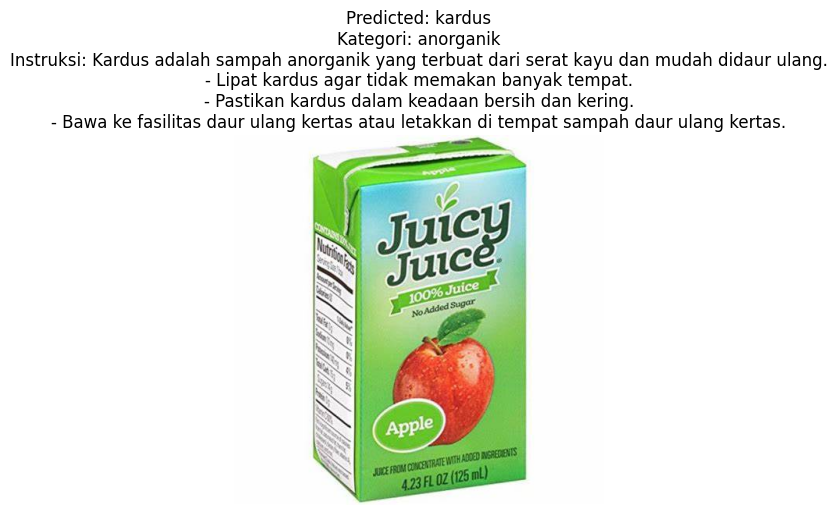

In [8]:
# Example usage
example_image_path = 'testModel/jus.JPG'
predict_and_display(example_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Class: metal
Kategori: anorganik
Instruksi Penanganan: Metal adalah sampah anorganik yang dapat didaur ulang menjadi produk metal baru.
- Bersihkan metal dari sisa makanan atau bahan lainnya.
- Pisahkan metal berdasarkan jenisnya jika memungkinkan.
- Bawa ke fasilitas daur ulang metal atau letakkan di tempat sampah daur ulang metal.


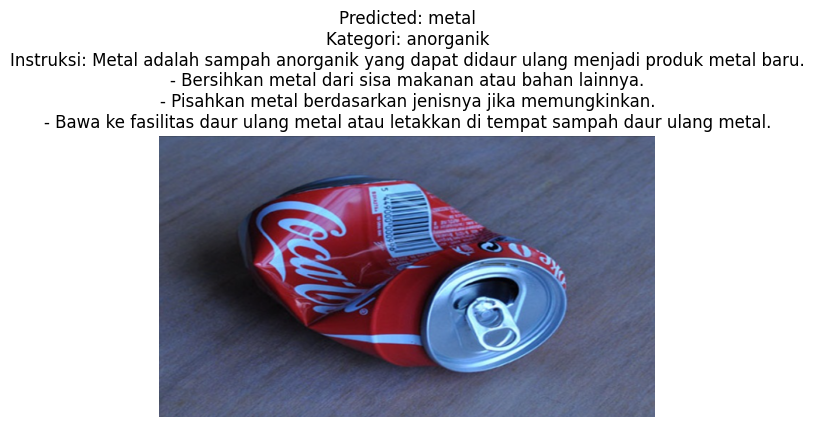

In [9]:
# Example usage
example_image_path = 'testModel/kokakola.png'
predict_and_display(example_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Class: kertas
Kategori: anorganik
Instruksi Penanganan: Kertas adalah sampah anorganik yang dapat didaur ulang menjadi produk kertas baru.
- Lipat atau gunting kertas agar lebih mudah diolah.
- Pastikan kertas dalam keadaan bersih dan kering.
- Bawa ke fasilitas daur ulang kertas atau letakkan di tempat sampah daur ulang kertas.


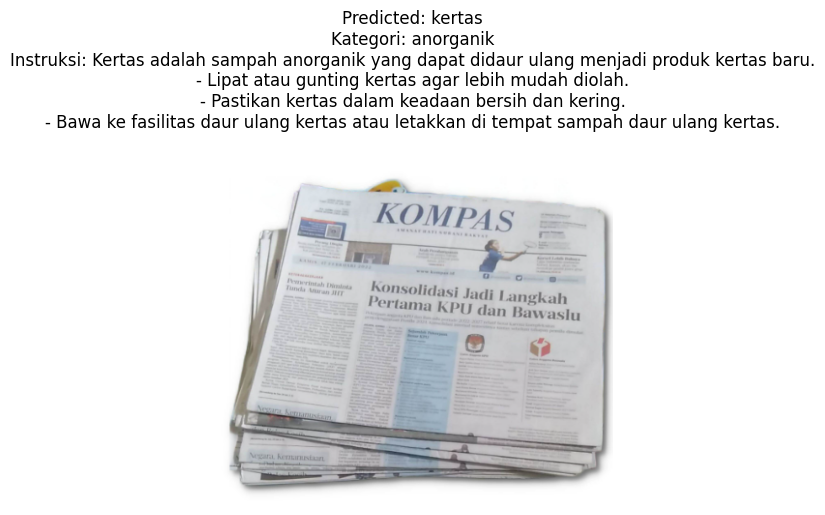

In [10]:
# Example usage
example_image_path = 'testModel/korang.png'
predict_and_display(example_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Class: sepatu
Kategori: anorganik
Instruksi Penanganan: Sepatu adalah sampah anorganik yang dapat didaur ulang atau digunakan kembali.
- Jika sepatu masih layak pakai, donasikan ke panti asuhan atau lembaga sosial.
- Jika tidak layak pakai, bawa ke fasilitas daur ulang tekstil.
- Pisahkan sepatu berdasarkan bahan pembuatannya jika memungkinkan.


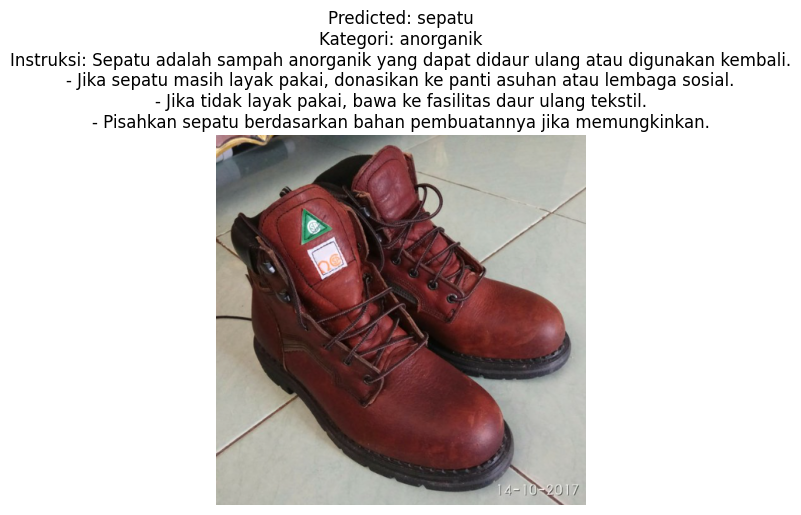

In [11]:
# Example usage
example_image_path = 'testModel/sapatu.png'
predict_and_display(example_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Class: biologis
Kategori: organik
Instruksi Penanganan: Sampah biologis atau organik adalah sisa-sisa bahan alami yang dapat terurai. Contohnya termasuk sisa makanan, daun, dan bahan taman.
- Kumpulkan sampah organik di tempat sampah khusus organik.
- Sampah organik bisa dikomposkan untuk menghasilkan pupuk alami.
- Hindari mencampur sampah organik dengan sampah anorganik untuk memudahkan proses pengomposan.


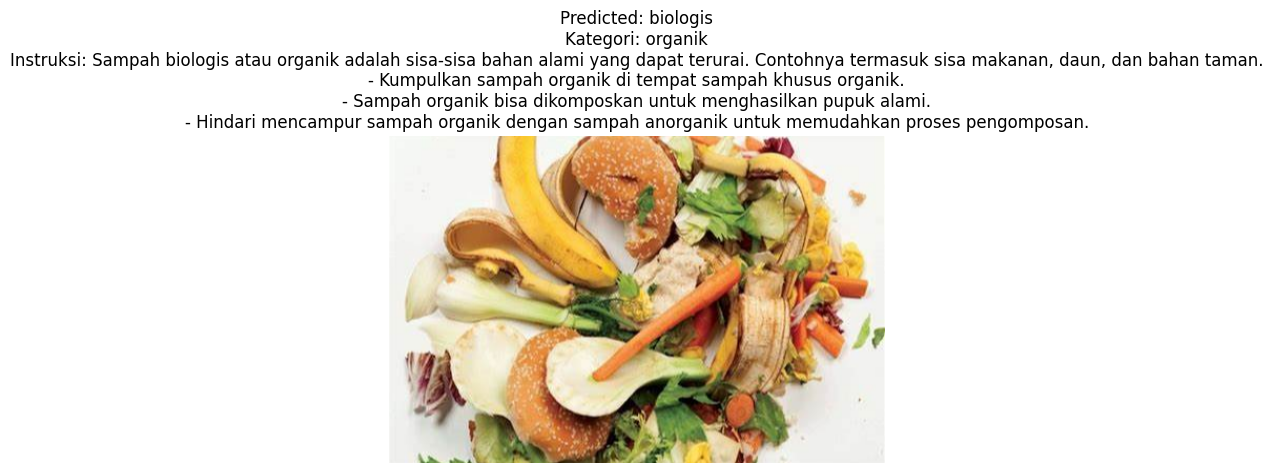

In [12]:
# Example usage
example_image_path = 'testModel/sisa.png'
predict_and_display(example_image_path)